<a href="https://colab.research.google.com/github/joarenasrojas/EquiposEstudioML/blob/master/colab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# some libraries
import pandas as pd 
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
#drive.mount('/content/drive')

In [4]:
from google.colab import drive
#drive.mount('/content/drive')

In [5]:
# reading csv files
# https://archive-beta.ics.uci.edu/ml/datasets/20
nombre_columnas = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
#data =  pd.read_csv('adult.data', sep=",", header=None, index_col = False,names =nombre_columnas)
url = 'https://raw.githubusercontent.com/joarenasrojas/EquiposEstudioML/master/adult.data'
data =  pd.read_csv(url, sep=",", header=None, index_col = False,names =nombre_columnas)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [ ]:
# Variables 
# age: continuous.
# workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
# fnlwgt: continuous.
# education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
# education-num: continuous.
# marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
# occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
# relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
# race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
# sex: Female, Male.
# capital-gain: continuous.
# capital-loss: continuous.
# hours-per-week: continuous.
# native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


In [10]:
# Variables
data.info()

# descriptivos
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
data.describe(include=object).T
# print('sigmaEta = 100 ' + 'Reg:' 'y={:.5f}*x'.format(0.00002))

,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital-status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native-country,32561,42,United-States,29170


In [12]:
categoryToView = ["education", "education-num"]
# for x in categoryToView: 
#  print(data[x].unique().tolist())

# 
data[categoryToView].drop_duplicates().sort_values('education-num')

,education,education-num
224,Preschool,1
160,1st-4th,2
56,5th-6th,3
15,7th-8th,4
6,9th,5
77,10th,6
3,11th,7
415,12th,8
2,HS-grad,9
10,Some-college,10


In [13]:
data[['relationship','education-num','age']].groupby('relationship').mean()

,education-num,age
relationship,,
Husband,10.326461,43.818616
Not-in-family,10.315593,38.346057
Other-relative,8.786952,33.164118
Own-child,9.486188,24.827940
Unmarried,9.642194,40.293964
Wife,10.463010,39.846301


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f66f269d910>,
      dtype=object)

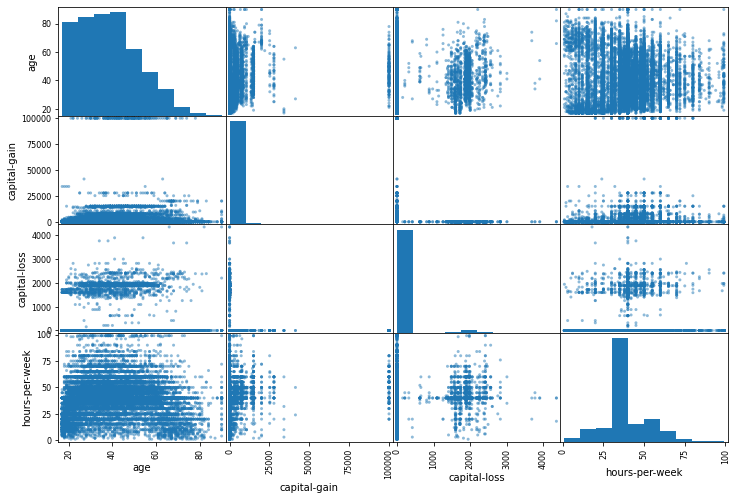

In [14]:
from pandas.plotting import scatter_matrix
attributes = ["education", "age", "capital-gain",
"capital-loss", "hours-per-week"]
scatter_matrix(data[attributes], figsize=(12, 8))

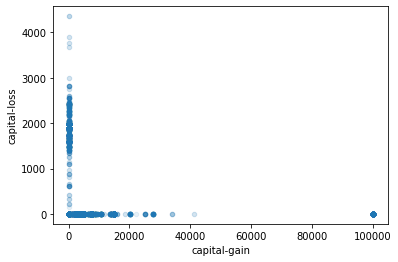

In [15]:
data.plot(kind="scatter", x="capital-gain", y="capital-loss",
alpha=0.1)
# Notamos que la variable de capital loss y capital gain pueden ser aglomeradas en una sola variable 

# podríamos hacer ganancia neta de capital ? 
data['net-capital'] = data['capital-gain'] - data['capital-loss']

In [16]:
data['net-capital'].describe()

count    32561.000000
mean       990.345014
std       7408.986951
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: net-capital, dtype: float64

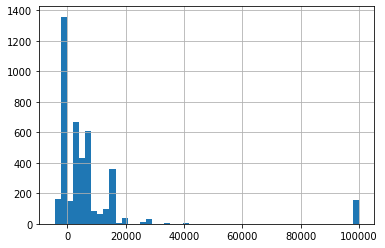

In [17]:
data['net-capital'][(data['net-capital'] ) != 0& (data['net-capital'] < 50_000) ].hist(bins = 50)

In [18]:
# POR CONSTRUIR LOOP Y MATRIZ DE CORRELACIÓN
from scipy.stats import spearmanr 
attributes = ["education-num", "age", "capital-gain",
"capital-loss", "net-capital" , "hours-per-week"]
dim = len(attributes)

temp1 = np.zeros((dim, dim) )
temp2 = np.zeros((dim, dim) )

k = 0 
for x in attributes: 
  j = 0 
  for y in attributes: 
    coef, p = spearmanr(data[[x, y]])
    temp1[k][j] = p
    temp2[k][j] = coef
    # temp1.append(p) 
    # temp2.append(coef) 
    # print('value p:' + '{:0.5f}'.format(p))
    # print('Var(p):' + '{:0.5f}'.format(coef))
    j = j + 1 
  k = k + 1 

In [19]:
pValueCorrData = pd.DataFrame(data = temp1, columns =attributes, index = attributes )
corrData = pd.DataFrame(data = temp2, columns = attributes, index = attributes )
corrData

,education-num,age,capital-gain,capital-loss,net-capital,hours-per-week
education-num,1.000000,0.066345,0.119140,0.074749,0.050493,0.167215
age,0.066345,1.000000,0.124948,0.058484,0.064212,0.142907
capital-gain,0.119140,0.124948,1.000000,-0.066569,0.820184,0.093322
capital-loss,0.074749,0.058484,-0.066569,1.000000,-0.625425,0.059852
net-capital,0.050493,0.064212,0.820184,-0.625425,1.000000,0.038768
hours-per-week,0.167215,0.142907,0.093322,0.059852,0.038768,1.000000


In [20]:
data[attributes].corr()

,education-num,age,capital-gain,capital-loss,net-capital,hours-per-week
education-num,1.000000,0.036527,0.122630,0.079923,0.117891,0.148123
age,0.036527,1.000000,0.077674,0.057775,0.074284,0.068756
capital-gain,0.122630,0.077674,1.000000,-0.031615,0.998521,0.078409
capital-loss,0.079923,0.057775,-0.031615,1.000000,-0.085902,0.054256
net-capital,0.117891,0.074284,0.998521,-0.085902,1.000000,0.075207
hours-per-week,0.148123,0.068756,0.078409,0.054256,0.075207,1.000000


In [21]:
pValueCorrData

,education-num,age,capital-gain,capital-loss,net-capital,hours-per-week
education-num,0.000000e+00,4.285518e-33,3.123818e-103,1.431041e-41,7.734806e-20,8.303130e-203
age,4.285518e-33,0.000000e+00,1.990658e-113,4.477212e-26,4.203905e-31,4.046798e-148
capital-gain,3.123818e-103,1.990658e-113,0.000000e+00,2.622246e-33,0.000000e+00,6.775130e-64
capital-loss,1.431041e-41,4.477212e-26,2.622246e-33,0.000000e+00,0.000000e+00,3.105313e-27
net-capital,7.734806e-20,4.203905e-31,0.000000e+00,0.000000e+00,0.000000e+00,2.598833e-12
hours-per-week,8.303130e-203,4.046798e-148,6.775130e-64,3.105313e-27,2.598833e-12,0.000000e+00


In [ ]:
## Capital Gain para predecir "White or non White"
## Capital Gain para predecir "race"

In [119]:
non_object_features = [col for i, col in enumerate(data.columns) if data[col].dtypes != np.dtype('O')]
# AVERIGUAR COMO AUTOMATIZAR

In [69]:
[col for i, col in enumerate(data.columns)]

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'net-capital']

In [111]:
#data['negative_cg'] = - data['capital-gain']
### para chequear si matriz de correlacion se "escala a sus cotas superiores e inferiores" --> condirmado (si)

In [120]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,net-capital
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,2174
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


<Figure size 1080x1080 with 0 Axes>

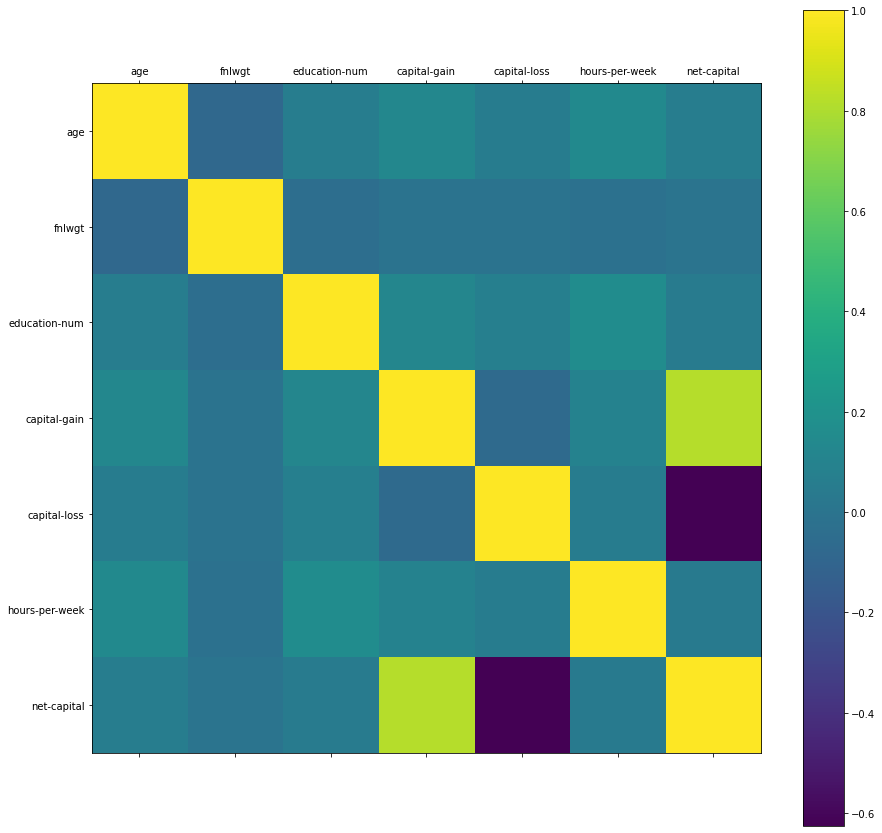

In [122]:
figsize = (15,15)
plt.figure(figsize = figsize)
fig, ax = plt.subplots(figsize = figsize)
cax = ax.matshow(data[non_object_features].corr(method = 'spearman'))
fig.colorbar(cax)

ax.set_xticklabels(['']+non_object_features)
ax.set_yticklabels(['']+non_object_features)

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f66da273fd0>,
      dtype=object)

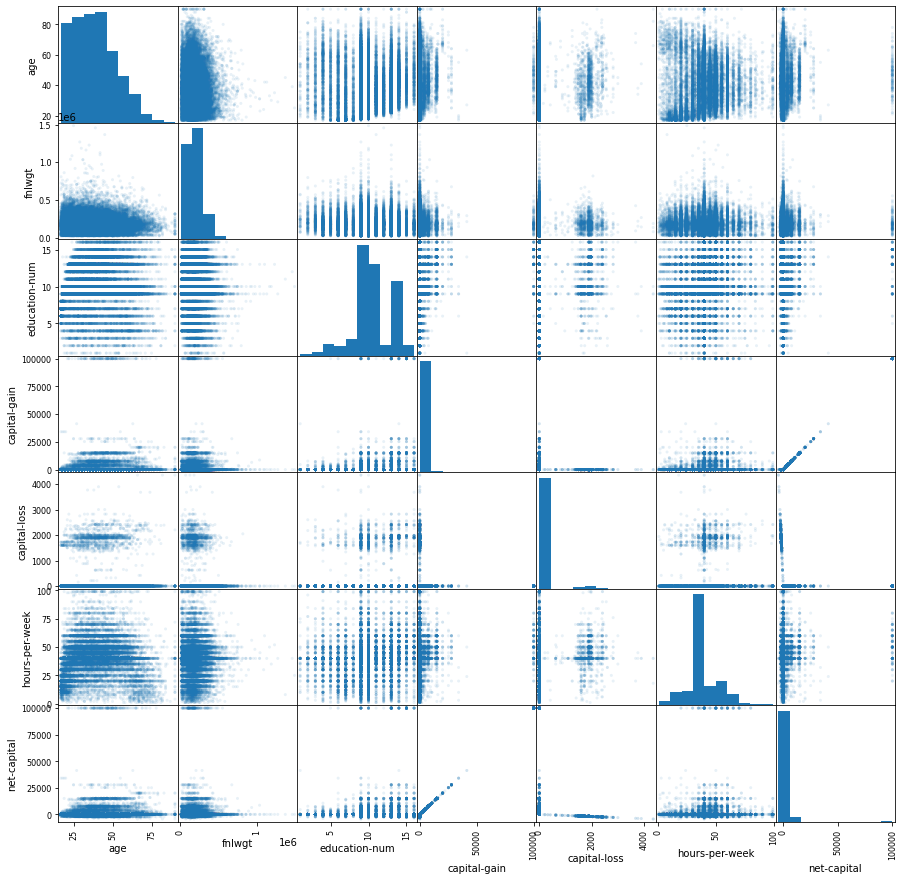

In [126]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[non_object_features], figsize=(15, 15), alpha = 0.1)

# Preprocesamiento

- Preprocesamiento (Pipelines)
  - **Variables categóricas**
    - Eliminar "espacios" (en categorías)
    - Codificar variables categóricas
      - ¿One hot encoding u otro tipo de transformación?
  - **Variables numéricas**
  
  - *Missing values* -> No hay
  - Transformaciones 
    - Escalar Variables numéricas (elegir escalar v/s normalizar)

- Split (train v/s test)

- Entrenar modelos
  - Función de pérdida
  - Validación Cruzada
  - *Perfomance* modelos
    - MAE, MSE, RMSE

- $*$Modelos de clasificación (uni-label y multi-label):
  - SGD classifier (one v/s one y one v/s all)
  - Modelo de discriminación lineal (one v/s one y one v/s all)
  - Logit (una clase) y Softmax (multiclase)
  - CART
  - Random Forest

In [176]:
data['race'] = [x.strip() for i,x in enumerate(data.race)]

In [174]:
# Boolean if White
#opcion_1
data['White'] = (data.race == 'White') + 0

#opcion_2 = [x == 'White' for i,x in enumerate(data['race'])]

#opcion_3 = []
#for i,x in enumerate(data.race):
#  opcion_3.append(x == 'White')

In [175]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,net-capital,White
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,2174,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,0
